# Week2授業前課題4（任意課題）
## ダーツ投げ問題
*＊本課題は任意課題です。提出は必須ではありません。*

ここでは、6つあるダーツのまとの中から一つ選びダーツを投げるシミュレーションを作成します。シミューレーションと言っても動画ではなく、以下のようなものを作成します。

(画像略)

実装する上での前提条件を以下に示します。


- 複数のダーツのまとは、間を空けずに横一列に並んでいるとします。
- ある番号のまとに狙ったダーツは、他のまとには行かないとします。

実装するフローは以下になります。


- ダーツのまとを選びます。（ここではサイコロを振り、出た目の番号を狙うまとの番号とします。）
- サイコロで出た番号のまとを選び、ダーツを投げます。（ここではダーツが刺さる場所は正規分布に従うとします。）
- ダーツが刺さった場所を記録します。（x座標、y座標だけではなく、どの番号のまとに向かって投げたかも記録します。）
- 1~3を指定回数（ダーツの投げる回数）だけ繰り返します。（指定回数は任意です。）
- 各番号のダーツが刺さった場所をプロットします。（ダーツのまとが6個なら、6個のダーツのまとが横に等間隔で並んでいるイメージです。）

これらのフローを以下の問題を通じて一つ一つ実装していきましょう。

# 問題1
## ダーツの的を選ぶ
ダーツのまとを選ぶためにサイコロを実装しましょう。

In [19]:
import numpy as np

def random_dice():
    dice_list = list(range(1, 7))
    return np.random.choice(dice_list)

print(random_dice())

4


# 問題2
## ダーツを投げて、刺さった場所を記録する
ダーツの刺さった場所(x座標、y座標)を正規分布から値を発生させることで表現しましょう。 **正規分布のx方向の「中心」は問題1で出たサイコロの番号、「標準偏差」は0.1としてください。 ** 刺さった場所（座標）は、配列で保持するようにしてください。

In [20]:
def throw_darts():
    roll = random_dice()
    mean = [roll, 0]
    # x, yは独立であるため共分散は0
    cov = [[0, 0.01], [0.01, 0]]
    return roll, np.random.multivariate_normal(mean, cov)

print(throw_darts())

(5, array([4.87978825, 0.05992545]))


# 問題3
## ダーツをたくさん投げて、まとの番号と紐付けた状態で記録する
ダーツを1000回投げて、全てのダーツの刺さった位置をディクショナリに格納してください。ディクショナリのkeyはダーツのまとの番号になります。

In [21]:
dict_throws = {
    1:[],
    2:[],
    3:[],
    4:[],
    5:[],
    6:[]
}

for _ in range(1000):
    throwing = throw_darts()
    dict_throws.get(throwing[0]).append(throwing[1])

print(dict_throws)

904, -0.01925118]), array([ 2.77712511, -0.12903349]), array([2.82829492, 0.17893703]), array([ 2.9909301 , -0.21170808]), array([3.08899169e+00, 1.59300753e-03]), array([ 2.88647445, -0.02114732]), array([2.97690465, 0.19426534]), array([2.83840063, 0.02863148]), array([ 2.90626915, -0.07751448]), array([2.99947026, 0.06494632]), array([2.81535445, 0.07165312]), array([3.03485366, 0.0387311 ]), array([ 2.95907651, -0.00572368]), array([2.93395964, 0.08076799]), array([ 3.03889697, -0.05103021]), array([2.82508543, 0.13689103]), array([ 3.02718308, -0.11370213]), array([3.11552195, 0.07501575]), array([3.0432858 , 0.00724504]), array([3.07809605, 0.16724882]), array([ 3.02949806, -0.04841759]), array([ 3.06609691, -0.02597969]), array([ 3.18202093, -0.05975217]), array([3.14220518, 0.1015421 ]), array([ 2.87362502, -0.02728681]), array([ 2.98255782, -0.03444598]), array([ 2.86337554, -0.00985741]), array([ 3.13525167, -0.06544152]), array([3.08540591, 0.09697188]), array([2.97984562, 0

# 問題4
## ダーツのまとと刺さった位置を描画する
問題3で作成したディクショナリからkeyごとに値を取り出し、まとごとに刺さった場所を描画してみましょう。ダーツのまとを表現するためここではmatplotlibのpatchesクラスを用いてください。

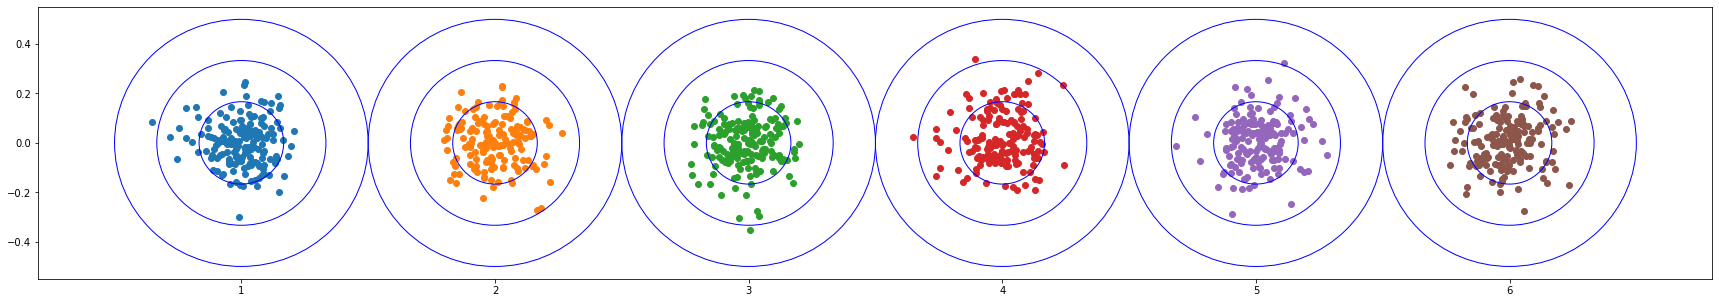

In [22]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline
fig = plt.figure(figsize=(30, 5))
ax = plt.axes()

for i in range(1, 7):
    circle_1 = patches.Circle(xy=(i, 0), radius=1/2,
                fc='None', ec='blue')
    circle_2 = patches.Circle(xy=(i, 0), radius=1/2*2/3,
                fc='None', ec='blue')
    circle_3 = patches.Circle(xy=(i, 0), radius=1/2*1/3,
                fc='None', ec='blue')
    ax.add_patch(circle_1)
    ax.add_patch(circle_2)
    ax.add_patch(circle_3)
    plt.scatter([x[0] for x in dict_throws.get(i)], 
                [y[1] for y in dict_throws.get(i)])
 
plt.show()

# 問題5
## 関数化
ダーツを投げる回数、ダーツのまとの数が変わっても描画できるように、問題1~問題4で作成したコードを関数化しましょう。

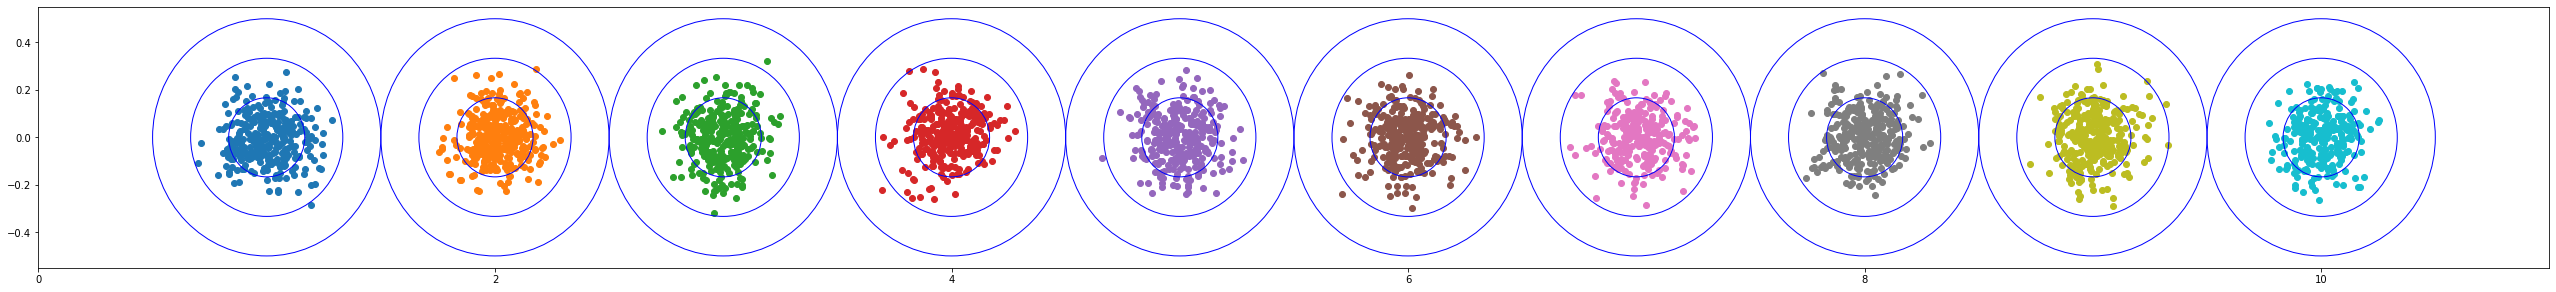

In [23]:
def darts(n_throw=1000, n_target=6):
    # 投擲記録格納用dictionary
    dict_throws = {}
    for i in range(1, n_target+1):
        dict_throws[i] = []
    
    # 共分散行列（条件は問題2参照）
    cov = [[0, 0.01], [0.01, 0]]

    # 投擲
    for i in range(n_throw):
        target = np.random.choice(list(range(1, n_target+1)))
        dict_throws.get(target).append(np.random.multivariate_normal([target, 0], cov))
    
    # 投擲記録の描画
    %matplotlib inline
    fig = plt.figure(figsize=(4.5*n_target, 4.8))
    ax = plt.axes()

    for i in range(1, n_target+1):
        circle_1 = patches.Circle(xy=(i, 0), radius=1/2,
                    fc='None', ec='blue')
        circle_2 = patches.Circle(xy=(i, 0), radius=1/2*2/3,
                    fc='None', ec='blue')
        circle_3 = patches.Circle(xy=(i, 0), radius=1/2*1/3,
                    fc='None', ec='blue')
        ax.add_patch(circle_1)
        ax.add_patch(circle_2)
        ax.add_patch(circle_3)
        plt.scatter([x[0] for x in dict_throws.get(i)], 
                    [y[1] for y in dict_throws.get(i)])
     
    plt.show()

darts(n_throw=3000, n_target=10)